# OpenAI Eustrivia

In [1]:
import pandas as pd

def get_dataframe(model, task):
    df = pd.read_json(f"../results/{model}/{task}_5-shot.jsonl", lines=True)
    return df

In [2]:
df_gpt35turbo_eustrivia = get_dataframe("gpt-3.5-turbo-0613", "eustrivia_test")

df_gpt35turbo_eustrivia_itzuli = get_dataframe("gpt-3.5-turbo-0613", "eustrivia_translatetestitzuli")

df_gpt35turbo1106_eustrivia = get_dataframe("gpt-3.5-turbo-1106", "eustrivia_test")

df_gpt35turbo1106_eustrivia_itzuli = get_dataframe("gpt-3.5-turbo-1106", "eustrivia_translatetestitzuli")

df_gpt4_eustrivia = get_dataframe("gpt-4-0613", "eustrivia_test")

df_gpt4_eustrivia_itzuli = get_dataframe("gpt-4-0613", "eustrivia_translatetestitzuli")

df_gpt4turbo_eustrivia = get_dataframe("gpt-4-1106-preview", "eustrivia_test")

df_gpt4turbo_eustrivia_itzuli = get_dataframe("gpt-4-1106-preview", "eustrivia_translatetestitzuli")


## Results by Category

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_dataframe_eustrivia(df):
    # add acc column 1 if correct else 0
    df["acc"] = df.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    
    # group by the "group" column and calculate the mean accuracy for each group
    # group attribute is in dict "doc"
    # combine Gai orokorrak and Nazioarteko gaiak into a single Gai orokorrak group
    df["group"] = df["group"].apply(lambda x: x if x != "Nazioarteko gaiak" else "Gai orokorrak")
    grouped = df.groupby("group")["acc"].mean()

    # group by the "difficulty" column and calculate the mean accuracy for each difficulty
    # difficulty attribute is in dict "doc"
    grouped_difficulty = df.groupby("difficulty")["acc"].mean()

    # group by the "category" column and calculate the mean accuracy for each category
    # category attribute is in dict "doc"
    grouped_category = df.groupby("category")["acc"].mean()

    # group by the "group" and "category" columns and calculate the mean accuracy for each group and category combination
    grouped_group_category = df.groupby(["category", "group"])["acc"].mean()

    # group by the "difficulty" and "category" columns and calculate the mean accuracy for each difficulty and category combination
    grouped_difficulty_category = df.groupby(["category", "difficulty"])["acc"].mean()

    # group by the "group" and "difficulty" columns and calculate the mean accuracy for each group and difficulty combination
    grouped_group_difficulty = df.groupby(["difficulty", "group"])["acc"].mean()

    # plot the results
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    grouped.plot(kind="bar", ax=axs[0], rot=0, title="Accuracy by Group")
    display(grouped)
    # grouped_difficulty.plot(kind="bar", ax=axs[0, 1], rot=0, title="Accuracy by Difficulty")
    grouped_category.plot(kind="bar", ax=axs[1], rot=90, title="Accuracy by Category")
    display(grouped_category)
    
    # grouped_group_category.unstack().plot(kind="bar", ax=axs[1, 1], rot=90, title="Accuracy by Category and Group")
    
    # grouped_difficulty_category.unstack().plot(kind="bar", ax=axs[2, 0], rot=90, title="Accuracy by Difficulty and Category")
    
    # grouped_group_difficulty.unstack().plot(kind="bar", ax=axs[2, 1], rot=0, title="Accuracy by Group and Difficulty")


group
Euskal gaiak     0.456257
Gai orokorrak    0.657926
Name: acc, dtype: float64

category
Euskara eta literatura     0.476667
Geografia eta Historia     0.606667
Gizartea eta ohiturak      0.568333
Kirola eta aisialdia       0.576159
Kultura eta artea          0.583333
Musika eta dantza          0.521667
Zientzia eta teknologia    0.578333
Zinema eta ikuskizunak     0.586667
Name: acc, dtype: float64

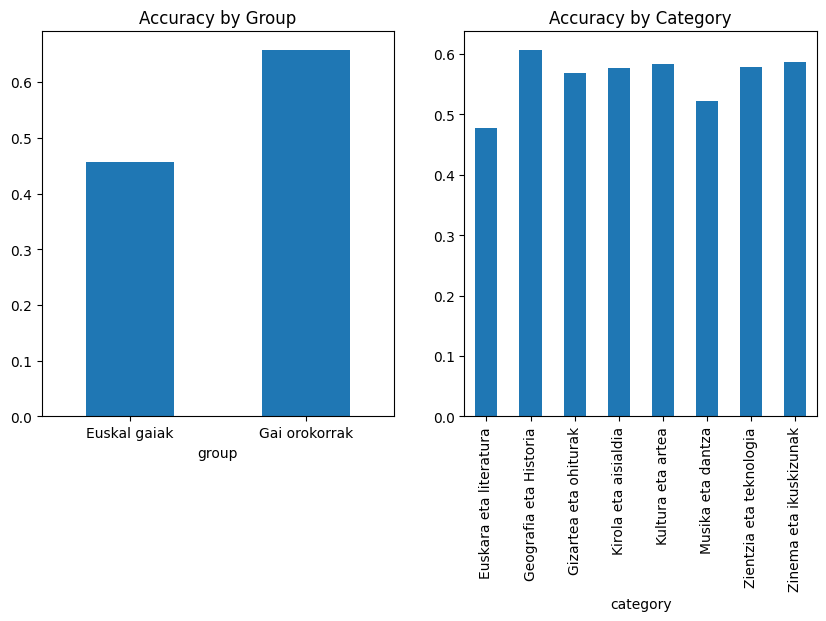

In [4]:
plot_dataframe_eustrivia(df_gpt35turbo_eustrivia)

group
Euskal gaiak     0.617889
Gai orokorrak    0.830920
Name: acc, dtype: float64

category
Euskara eta literatura     0.643333
Geografia eta Historia     0.746667
Gizartea eta ohiturak      0.813333
Kirola eta aisialdia       0.733444
Kultura eta artea          0.765000
Musika eta dantza          0.656667
Zientzia eta teknologia    0.733333
Zinema eta ikuskizunak     0.745000
Name: acc, dtype: float64

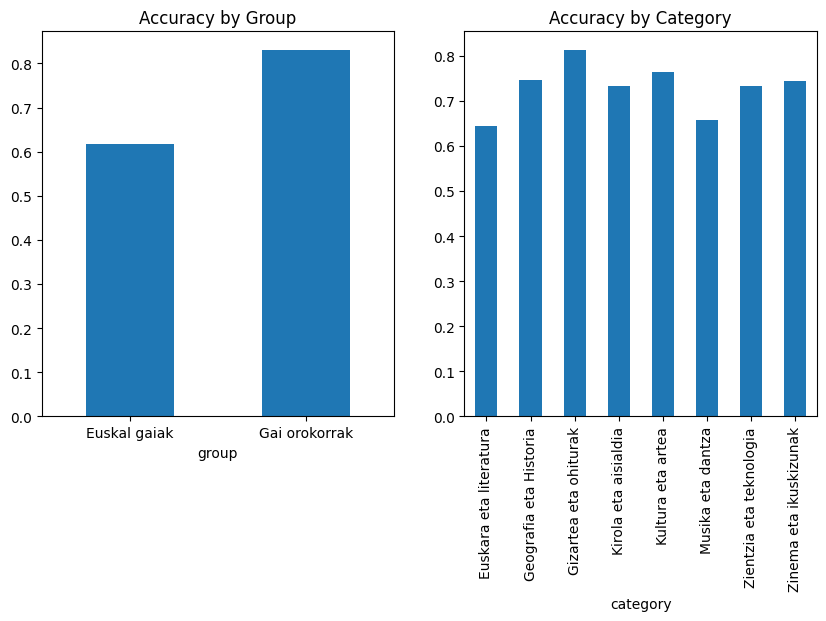

In [5]:
plot_dataframe_eustrivia(df_gpt4_eustrivia)

In [6]:
def plot_eu_en_sizes(df_gpt35turbo_eustrivia, df_gpt35turbo_eustrivia_itzuli, df_gpt35turbo1106_eustrivia, df_gpt35turbo1106_eustrivia_itzuli, df_gpt4_eustrivia, df_gpt4_eustrivia_itzuli, df_gpt4turbo_eustrivia, df_gpt4turbo_eustrivia_itzuli):
    merged = pd.DataFrame()
    merged["M=GPT3.5 Turbo 0613 D=EU"] = df_gpt35turbo_eustrivia.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT3.5 Turbo 0613 D=EN"] = df_gpt35turbo_eustrivia_itzuli.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT3.5 Turbo 1106 D=EU"] = df_gpt35turbo1106_eustrivia.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT3.5 Turbo 1106 D=EN"] = df_gpt35turbo1106_eustrivia_itzuli.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT4 0613              D=EU"] = df_gpt4_eustrivia.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT4 0613              D=EN"] = df_gpt4_eustrivia_itzuli.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT4 Turbo 1106    D=EU"] = df_gpt4turbo_eustrivia.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT4 Turbo 1106    D=EN"] = df_gpt4turbo_eustrivia_itzuli.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["group"] = df_gpt35turbo_eustrivia["group"].apply(lambda x: x if x != "Nazioarteko gaiak" else "Gai orokorrak")
    merged["difficulty"] = df_gpt35turbo_eustrivia["difficulty"]
    merged["category"] = df_gpt35turbo_eustrivia["category"]

    merged_grouped = merged.groupby("group").mean()
    merged_grouped_difficulty = merged.groupby("difficulty").mean()
    merged_grouped_category = merged.groupby("category").mean()
    # remove difficulty from merged_grouped and merged_grouped_category
    merged_grouped.drop("difficulty", axis=1, inplace=True)
    merged_grouped_category.drop("difficulty", axis=1, inplace=True)

    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    merged_grouped.plot(kind="bar", ax=axs[0], rot=0, title="Accuracy by Group")
    #merged_grouped_difficulty.plot(kind="bar", ax=axs[2], rot=0, title="Accuracy by Difficulty")
    merged_grouped_category.plot(kind="bar", ax=axs[1], rot=90, title="Accuracy by Category")
    
    # add plot that combines group and category
    """
    merged_group_category = merged.groupby(["category", "group"]).mean()
    merged_group_category.drop("difficulty", axis=1, inplace=True)
    merged_group_category.plot(kind="bar", rot=90, title="Accuracy by Category and Group")
    # make this plot bigger
    plt.gcf().set_size_inches(20, 6)
    """

/tmp/ipykernel_394464/736777152.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_grouped = merged.groupby("group").mean()
/tmp/ipykernel_394464/736777152.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_grouped_difficulty = merged.groupby("difficulty").mean()
/tmp/ipykernel_394464/736777152.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_grouped_category = merged.groupby("category").m

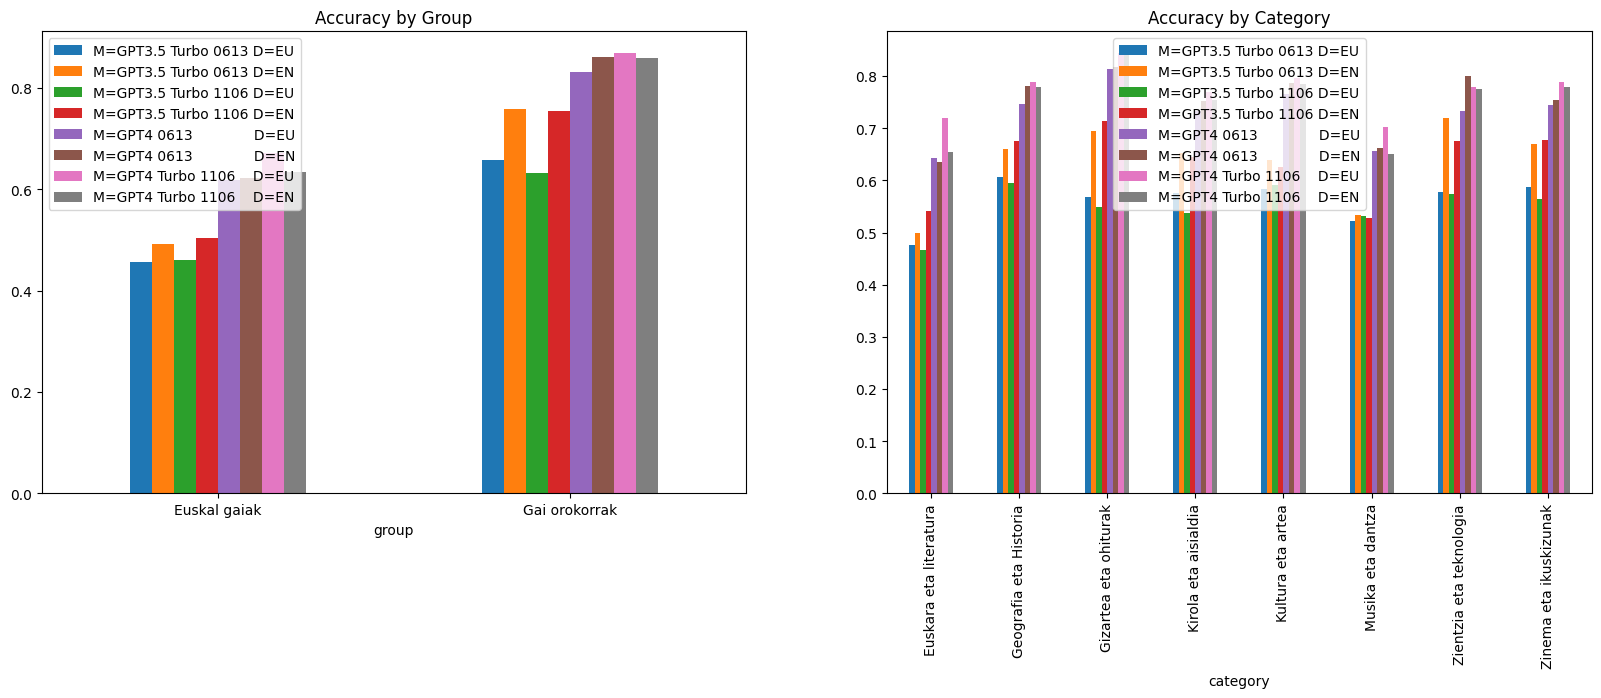

In [7]:
plot_eu_en_sizes(df_gpt35turbo_eustrivia, df_gpt35turbo_eustrivia_itzuli, df_gpt35turbo1106_eustrivia, df_gpt35turbo1106_eustrivia_itzuli, df_gpt4_eustrivia, df_gpt4_eustrivia_itzuli, df_gpt4turbo_eustrivia, df_gpt4turbo_eustrivia_itzuli)

## Overlap

Code to measure the overlap between correct and incorrect answers of openai models. That is, do the models fail at the same examples?


In [8]:
def overlap(df_gpt35turbo_eustrivia, df_gpt35turbo_eustrivia_itzuli, df_gpt35turbo1106_eustrivia, df_gpt35turbo1106_eustrivia_itzuli, df_gpt4_eustrivia, df_gpt4_eustrivia_itzuli, df_gpt4turbo_eustrivia, df_gpt4turbo_eustrivia_itzuli):
    merged = pd.DataFrame()
    merged["M=GPT3.5 Turbo 0613 D=EU"] = df_gpt35turbo_eustrivia.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT3.5 Turbo 0613 D=EN"] = df_gpt35turbo_eustrivia_itzuli.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT3.5 Turbo 1106 D=EU"] = df_gpt35turbo1106_eustrivia.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT3.5 Turbo 1106 D=EN"] = df_gpt35turbo1106_eustrivia_itzuli.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT4 0613              D=EU"] = df_gpt4_eustrivia.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT4 0613              D=EN"] = df_gpt4_eustrivia_itzuli.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT4 Turbo 1106    D=EU"] = df_gpt4turbo_eustrivia.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT4 Turbo 1106    D=EN"] = df_gpt4turbo_eustrivia_itzuli.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["group"] = df_gpt35turbo_eustrivia["group"].apply(lambda x: x if x != "Nazioarteko gaiak" else "Gai orokorrak")
    merged["difficulty"] = df_gpt35turbo_eustrivia["difficulty"]
    merged["category"] = df_gpt35turbo_eustrivia["category"]
    
    # mesure overlap between models
    # overlap between GPT3.5 Turbo 0613 and GPT3.5 Turbo 1106
    print("Overlap between GPT3.5 Turbo 0613 and GPT3.5 Turbo 1106")
    print(merged["M=GPT3.5 Turbo 0613 D=EU"].corr(merged["M=GPT3.5 Turbo 1106 D=EU"]))
    print(merged["M=GPT3.5 Turbo 0613 D=EN"].corr(merged["M=GPT3.5 Turbo 1106 D=EN"]))
    # overlap between GPT3.5 Turbo 0613 and GPT4 0613
    print("Overlap between GPT3.5 Turbo 0613 and GPT4 0613")
    print(merged["M=GPT3.5 Turbo 0613 D=EU"].corr(merged["M=GPT4 0613              D=EU"]))
    print(merged["M=GPT3.5 Turbo 0613 D=EN"].corr(merged["M=GPT4 0613              D=EN"]))
    # overlap between GPT3.5 Turbo 0613 and GPT4 Turbo 1106
    print("Overlap between GPT3.5 Turbo 0613 and GPT4 Turbo 1106")
    print(merged["M=GPT3.5 Turbo 0613 D=EU"].corr(merged["M=GPT4 Turbo 1106    D=EU"]))
    print(merged["M=GPT3.5 Turbo 0613 D=EN"].corr(merged["M=GPT4 Turbo 1106    D=EN"]))
    # overlap between GPT3.5 Turbo 1106 and GPT4 0613
    print("Overlap between GPT3.5 Turbo 1106 and GPT4 0613")
    print(merged["M=GPT3.5 Turbo 1106 D=EU"].corr(merged["M=GPT4 0613              D=EU"]))
    print(merged["M=GPT3.5 Turbo 1106 D=EN"].corr(merged["M=GPT4 0613              D=EN"]))
    # overlap between GPT3.5 Turbo 1106 and GPT4 Turbo 1106
    print("Overlap between GPT3.5 Turbo 1106 and GPT4 Turbo 1106")
    print(merged["M=GPT3.5 Turbo 1106 D=EU"].corr(merged["M=GPT4 Turbo 1106    D=EU"]))
    print(merged["M=GPT3.5 Turbo 1106 D=EN"].corr(merged["M=GPT4 Turbo 1106    D=EN"]))
    # overlap between GPT4 0613 and GPT4 Turbo 1106
    print("Overlap between GPT4 0613 and GPT4 Turbo 1106")
    print(merged["M=GPT4 0613              D=EU"].corr(merged["M=GPT4 Turbo 1106    D=EU"]))
    print(merged["M=GPT4 0613              D=EN"].corr(merged["M=GPT4 Turbo 1106    D=EN"]))

In [9]:
overlap(df_gpt35turbo_eustrivia, df_gpt35turbo_eustrivia_itzuli, df_gpt35turbo1106_eustrivia, df_gpt35turbo1106_eustrivia_itzuli, df_gpt4_eustrivia, df_gpt4_eustrivia_itzuli, df_gpt4turbo_eustrivia, df_gpt4turbo_eustrivia_itzuli)

Overlap between GPT3.5 Turbo 0613 and GPT3.5 Turbo 1106
0.49355887559791817
0.6554357542710532
Overlap between GPT3.5 Turbo 0613 and GPT4 0613
0.29174579595850314
0.45585578807541827
Overlap between GPT3.5 Turbo 0613 and GPT4 Turbo 1106
0.2532593706842861
0.4395183810484359
Overlap between GPT3.5 Turbo 1106 and GPT4 0613
0.2935975615068052
0.44306588216614995
Overlap between GPT3.5 Turbo 1106 and GPT4 Turbo 1106
0.24742070584627018
0.4144016462110254
Overlap between GPT4 0613 and GPT4 Turbo 1106
0.5183826730778096
0.6308816289334418


In [16]:
def overlap_correct_incorrect(df_gpt35turbo_eustrivia, df_gpt35turbo_eustrivia_itzuli, df_gpt35turbo1106_eustrivia, df_gpt35turbo1106_eustrivia_itzuli, df_gpt4_eustrivia, df_gpt4_eustrivia_itzuli, df_gpt4turbo_eustrivia, df_gpt4turbo_eustrivia_itzuli):
    merged = pd.DataFrame()
    merged["M=GPT3.5 Turbo 0613 D=EU"] = df_gpt35turbo_eustrivia.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT3.5 Turbo 0613 D=EN"] = df_gpt35turbo_eustrivia_itzuli.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT3.5 Turbo 1106 D=EU"] = df_gpt35turbo1106_eustrivia.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT3.5 Turbo 1106 D=EN"] = df_gpt35turbo1106_eustrivia_itzuli.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT4 0613              D=EU"] = df_gpt4_eustrivia.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT4 0613              D=EN"] = df_gpt4_eustrivia_itzuli.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT4 Turbo 1106    D=EU"] = df_gpt4turbo_eustrivia.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT4 Turbo 1106    D=EN"] = df_gpt4turbo_eustrivia_itzuli.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["group"] = df_gpt35turbo_eustrivia["group"].apply(lambda x: x if x != "Nazioarteko gaiak" else "Gai orokorrak")
    merged["difficulty"] = df_gpt35turbo_eustrivia["difficulty"]
    merged["category"] = df_gpt35turbo_eustrivia["category"]
    
    # mesure overlap between models
    # overlap between GPT3.5 Turbo 0613 and GPT3.5 Turbo 1106
    print("Overlap between GPT3.5 Turbo 0613 and GPT3.5 Turbo 1106")
    correct1 = merged["M=GPT3.5 Turbo 0613 D=EU"] == 1
    correct2 = merged["M=GPT3.5 Turbo 1106 D=EU"] == 1
    print(f"Percentage when correct1 is True: {sum(correct1 & correct2)/sum(correct1)*100:.2f}%")
    print(f"Percentage when correct1 is False: {sum(~correct1 & ~correct2)/sum(~correct1)*100:.2f}%")
    print("Overlap between GPT3.5 Turbo 0613 and GPT4 0613")
    correct1 = merged["M=GPT3.5 Turbo 0613 D=EU"] == 1
    correct2 = merged["M=GPT4 0613              D=EU"] == 1
    print(f"Percentage when correct1 is True: {sum(correct1 & correct2)/sum(correct1)*100:.2f}%")
    print(f"Percentage when correct1 is False: {sum(~correct1 & ~correct2)/sum(~correct1)*100:.2f}%")
    print("Overlap between GPT3.5 Turbo 0613 and GPT4 Turbo 1106")
    correct1 = merged["M=GPT3.5 Turbo 0613 D=EU"] == 1
    correct2 = merged["M=GPT4 Turbo 1106    D=EU"] == 1
    print(f"Percentage when correct1 is True: {sum(correct1 & correct2)/sum(correct1)*100:.2f}%")
    print(f"Percentage when correct1 is False: {sum(~correct1 & ~correct2)/sum(~correct1)*100:.2f}%")
    print("Overlap between GPT3.5 Turbo 1106 and GPT4 0613")
    correct1 = merged["M=GPT3.5 Turbo 1106 D=EU"] == 1
    correct2 = merged["M=GPT4 0613              D=EU"] == 1
    print(f"Percentage when correct1 is True: {sum(correct1 & correct2)/sum(correct1)*100:.2f}%")
    print(f"Percentage when correct1 is False: {sum(~correct1 & ~correct2)/sum(~correct1)*100:.2f}%")
    print("Overlap between GPT3.5 Turbo 1106 and GPT4 Turbo 1106")
    correct1 = merged["M=GPT3.5 Turbo 1106 D=EU"] == 1
    correct2 = merged["M=GPT4 Turbo 1106    D=EU"] == 1
    print(f"Percentage when correct1 is True: {sum(correct1 & correct2)/sum(correct1)*100:.2f}%")
    print(f"Percentage when correct1 is False: {sum(~correct1 & ~correct2)/sum(~correct1)*100:.2f}%")
    print("Overlap between GPT4 0613 and GPT4 Turbo 1106")
    correct1 = merged["M=GPT4 0613              D=EU"] == 1
    correct2 = merged["M=GPT4 Turbo 1106    D=EU"] == 1
    print(f"Percentage when correct1 is True: {sum(correct1 & correct2)/sum(correct1)*100:.2f}%")
    print(f"Percentage when correct1 is False: {sum(~correct1 & ~correct2)/sum(~correct1)*100:.2f}%")


In [17]:
overlap_correct_incorrect(df_gpt35turbo_eustrivia, df_gpt35turbo_eustrivia_itzuli, df_gpt35turbo1106_eustrivia, df_gpt35turbo1106_eustrivia_itzuli, df_gpt4_eustrivia, df_gpt4_eustrivia_itzuli, df_gpt4turbo_eustrivia, df_gpt4turbo_eustrivia_itzuli)

Overlap between GPT3.5 Turbo 0613 and GPT3.5 Turbo 1106
Percentage when correct1 is True: 76.55%
Percentage when correct1 is False: 72.92%
Overlap between GPT3.5 Turbo 0613 and GPT4 0613
Percentage when correct1 is True: 84.07%
Percentage when correct1 is False: 42.17%
Overlap between GPT3.5 Turbo 0613 and GPT4 Turbo 1106
Percentage when correct1 is True: 86.53%
Percentage when correct1 is False: 34.91%
Overlap between GPT3.5 Turbo 1106 and GPT4 0613
Percentage when correct1 is True: 84.40%
Percentage when correct1 is False: 41.94%
Overlap between GPT3.5 Turbo 1106 and GPT4 Turbo 1106
Percentage when correct1 is True: 86.52%
Percentage when correct1 is False: 34.38%
Overlap between GPT4 0613 and GPT4 Turbo 1106
Percentage when correct1 is True: 90.48%
Percentage when correct1 is False: 58.32%
